## Relative Improvement

/tmp/ipykernel_705329/771667969.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_xticklabels(labels)
/tmp/ipykernel_705329/771667969.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_yticklabels(labels)


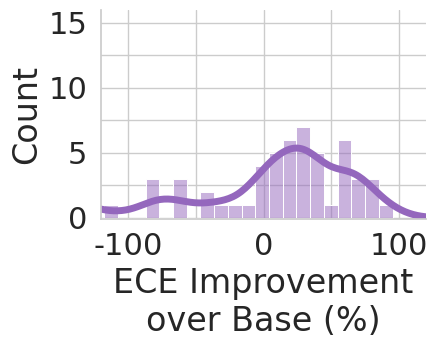

In [12]:
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter

sns.set_theme(font_scale=2., style="whitegrid")

ref = plt_results[plt_results.train_mode == "$\mathrm{IT}$"]["qa_unc_ece_100"].values
new = plt_results[plt_results.train_mode == "$\mathrm{UT}$"]["qa_unc_ece_100"].values



g = sns.displot(
    pd.DataFrame({ "rel_imp": -((new - ref) / ref) * 100. }),
    # kind="kde", fill=True, bw_adjust=.5,
    kde=True, stat="count", kde_kws={"bw_adjust": .5, "cut": 2}, binwidth=10,
    height=4, aspect=11/9, 
    legend=False,
    palette=sns.color_palette("tab20")[8:9]
)

g.ax.get_lines()[0].set(linewidth=5)

import matplotlib.ticker as ticker
g.ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
g.ax.yaxis.set_major_locator(ticker.MultipleLocator(2.5))

g.ax.set_ylim(-0.1, 16)
g.ax.set_xlim(-120, 120)

labels= [f"{int(x)}" for x in g.ax.get_xticks()]
labels[0] = ""
labels[2] = ""
labels[4] = ""
g.ax.set_xticklabels(labels)

labels= [f"{int(x)}" for x in g.ax.get_yticks()]
labels[0] = ""
labels[2] = ""
labels[4] = ""
labels[6] = ""
g.ax.set_yticklabels(labels)

g.set(xlabel="ECE Improvement\nover Base (%)")

g.fig.tight_layout()
g.fig.show()
g.fig.savefig("mmlu_rel_imp_mcqa.pdf", bbox_inches="tight")

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# sns.set(font_scale=2., style='whitegrid')

# metric = "qa_unc_ece_100"
# flip = -1 if metric in ["ece", "qa_unc_ece", "qa_unc_ece_100"] else 1

# ut_metric = plt_results[plt_results.train_mode == "$\mathrm{UT}$"][[metric]].values.flatten()
# it_metric = plt_results[plt_results.train_mode == "$\mathrm{IT}$"][[metric]].values.flatten()

# print(sum(flip * ut_metric <= flip * it_metric))

# fig, ax = plt.subplots(figsize=(5,5))

# ax.set_yticks(np.arange(0, 15, 5))

# ax.hist((((ut_metric - it_metric) * flip / it_metric)) * 100.)

# fig.show()

## Task Breakdown

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(font_scale=6., style='whitegrid')

fig, ax = plt.subplots(figsize=(200, 40))

sns.barplot(ax=ax, data=plt_results,
            x="task_idx", y="unc_acc_100", hue="train_mode",
            width=0.68,
            palette=sns.color_palette("tab20")[8:10])

ax.set_ylabel('Query Acc. (%)', fontsize=250, labelpad=100)
ax.set_ylim(30, 80)
ax.set_yticks(np.arange(0, 100 + 1e-3, 20))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=150)

ax.set_xlabel('MMLU Task ID', fontsize=250, labelpad=100)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=150)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='best',
          title='', title_fontsize=200,
          prop=dict(size=180), bbox_to_anchor=(.91, .7, .1, .1))

fig.tight_layout()
fig.show()
# fig.savefig("mmlu_correctness_comparison.pdf", bbox_inches="tight")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(font_scale=6., style='whitegrid')

fig, ax = plt.subplots(figsize=(200, 40))

sns.barplot(ax=ax, data=plt_results,
            x="task_idx", y="qa_unc_ece_100", hue="train_mode",
            width=0.68,
            palette=sns.color_palette("tab20")[8:10])

ax.set_ylabel(r'$\mathrm{ECE} (\%)$', fontsize=250, labelpad=100)
ax.set_yticks(np.arange(0, 30 + 1e-3, 10))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=150)

ax.set_xlabel('MMLU Task ID', fontsize=250, labelpad=100)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=150)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper left',
          title='', title_fontsize=200,
          prop=dict(size=180))

fig.tight_layout()
fig.show()
fig.savefig("mmlu_ece_comparison.pdf", bbox_inches="tight")

In [16]:
df = pd.read_csv("../sampling_results.csv")

#selecting columns
samp_count_df = df[['dataset', 'fuzzy_gpt-3\\\\.5-turbo-1106_ece_counting', 'fuzzy_gpt-3\\\\.5-turbo-1106_auroc_counting']]
samp_count_df['style'] = "samp_count"

samp_count_df = df[['dataset', 'fuzzy_gpt-3\\\\.5-turbo-1106_ece_likelihood', 'fuzzy_gpt-3\\\\.5-turbo-1106_auroc_likelihood']]
samp_count_df['style'] = "samp_likelihood"

print(samp_count_df)

                          dataset  fuzzy_gpt-3\\.5-turbo-1106_ece_likelihood  \
0     mmlu:electrical_engineering                                   0.079173   
1     mmlu:electrical_engineering                                   0.095108   
2     mmlu:electrical_engineering                                   0.079173   
3     mmlu:electrical_engineering                                   0.095108   
4     mmlu:electrical_engineering                                   0.079173   
...                           ...                                        ...   
1720         mmlu:business_ethics                                   0.376227   
1721         mmlu:business_ethics                                   0.192948   
1722         mmlu:business_ethics                                   0.376227   
1723         mmlu:business_ethics                                   0.192948   
1724         mmlu:business_ethics                                   0.376227   

      fuzzy_gpt-3\\.5-turbo-1106_auroc_

/tmp/ipykernel_2491448/2150783494.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp_count_df['style'] = "samp_count"
/tmp/ipykernel_2491448/2150783494.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp_count_df['style'] = "samp_likelihood"


/tmp/ipykernel_2491448/1360759673.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp_count_df['style'] = "samp_count"
/tmp/ipykernel_2491448/1360759673.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp_count_df['unc_ece'] = samp_count_df['fuzzy_gpt-3\\\\.5-turbo-1106_ece_counting']
/tmp/ipykernel_2491448/1360759673.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Text(0.5, 0, '')

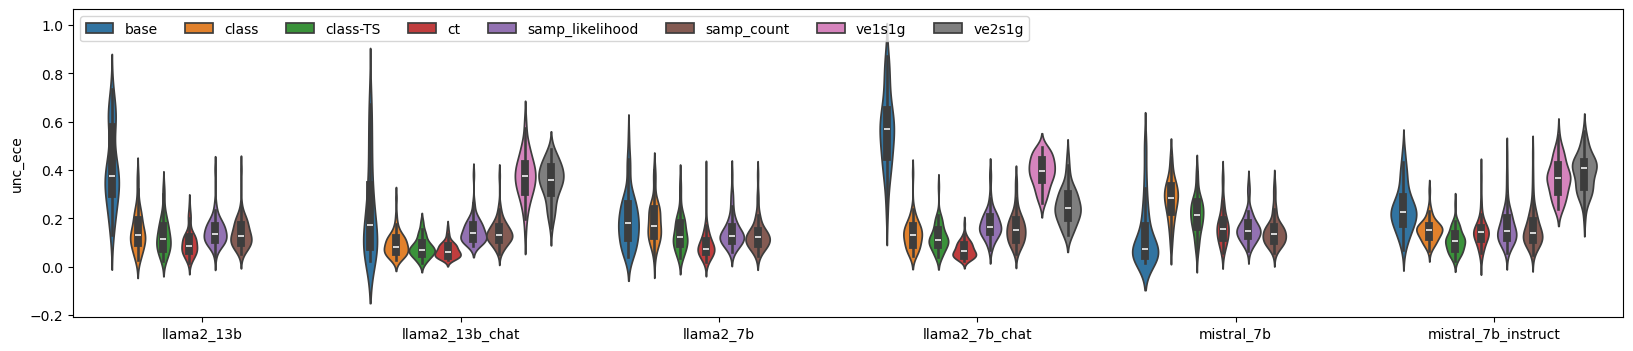

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

all_dfs = []
for fn in glob.glob("results/eval-mmlu_oe-base/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "Query_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_choice-base/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "Query_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

base_df = pd.concat(all_dfs)


all_dfs = []
for fn in glob.glob("results/eval-mmlu_oe-ct/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "ct_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

ct_df = pd.concat(all_dfs)

df = pd.read_csv("../classifier_results.csv")
df["model_name"] = df["model_name"].apply(lambda x: "class_" + x)
df["mode_tag"] = df["train_mode"] + " -> " + df["eval_mode"]

ts_df = pd.read_csv("../classifier_ts_results.csv")
ts_df["model_name"] = ts_df["model_name"].apply(lambda x: "class-TS_" + x)
ts_df["mode_tag"] = ts_df["train_mode"] + " -> " + ts_df["eval_mode"]

# df["model"] = df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
# df["style"] = df["model_name"].apply(lambda x: x.split("_")[0])

df = pd.concat([df, ts_df, base_df, ct_df])
df = df[df["mode_tag"] == "oe -> oe"]

df["model"] = df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
df["style"] = df["model_name"].apply(lambda x: x.split("_")[0])

ve_df = pd.read_csv("../ve_results.csv")
ve_df = ve_df[ve_df["eval_mode"] == "oe"]
ve_df["model"] = ve_df["model_name"]
ve_df["style"] = ve_df["eval_method"]

samp_df = pd.read_csv("../sampling_results.csv")

samp_count_df = samp_df[['dataset', 'fuzzy_gpt-3\\\\.5-turbo-1106_ece_counting', 'fuzzy_gpt-3\\\\.5-turbo-1106_auroc_counting','split','model']]
samp_count_df['style'] = "samp_count"
samp_count_df['unc_ece'] = samp_count_df['fuzzy_gpt-3\\\\.5-turbo-1106_ece_counting']

samp_likeli_df = samp_df[['dataset', 'fuzzy_gpt-3\\\\.5-turbo-1106_ece_likelihood', 'fuzzy_gpt-3\\\\.5-turbo-1106_auroc_likelihood','split','model']]
samp_likeli_df['style'] = "samp_likelihood"
samp_likeli_df['unc_ece'] = samp_likeli_df['fuzzy_gpt-3\\\\.5-turbo-1106_ece_likelihood']

df = pd.concat([df, ve_df, samp_count_df, samp_likeli_df])
df = df[df["split"] == "test"]

#aggregate by model name
_df = df.groupby(["dataset", "model", "style"]).mean().reset_index()

fig, ax = plt.subplots(figsize=(20, 4))

sns.violinplot(
    ax=ax,
    data=_df,
    hue="style",
    hue_order=["base", "class", "class-TS", "ct", "samp_likelihood", "samp_count", "ve1s1g", "ve2s1g"],
    x="model",
    y="unc_ece",
    # hue_order=order,
)

handles, labels = ax.get_legend_handles_labels()

sns.violinplot(
    data=_df,
    hue="style",
    hue_order=["base", "class", "class-TS", "ct", "samp_likelihood", "samp_count", "ve1s1g", "ve2s1g"],
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_unc_ece",
    # hue_order=order,
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

ax.legend(handles=handles, labels=labels, loc='upper left', ncol=8)

plt.xlabel("")

# rotate the labels
# plt.xticks(rotation=30)

Text(0.5, 0, '')

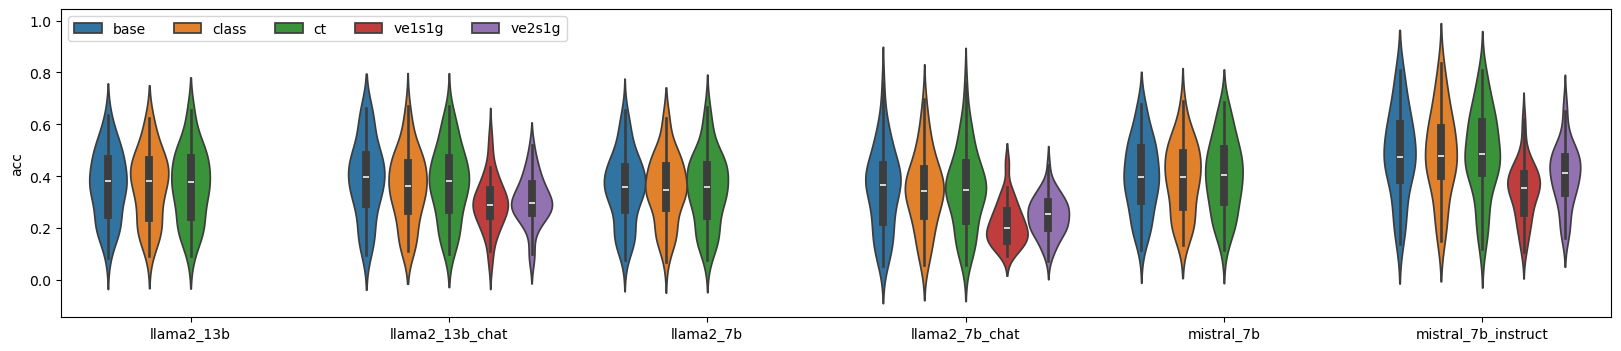

In [2]:
fig, ax = plt.subplots(figsize=(20, 4))

sns.violinplot(
    ax=ax,
    data=_df,
    hue="style",
    hue_order=["base", "class", "ct", "ve1s1g", "ve2s1g"],
    x="model",
    y="acc",
    # hue_order=order,
)

handles, labels = ax.get_legend_handles_labels()

sns.violinplot(
    data=_df,
    hue="style",
    hue_order=["base", "class", "ct", "ve1s1g", "ve2s1g"],
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_acc",
    # hue_order=order,
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

ax.legend(handles=handles, labels=labels, loc='upper left', ncol=6)

plt.xlabel("")

# rotate the labels
# plt.xticks(rotation=30)

/tmp/ipykernel_2491448/3542024144.py:60: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  _df = df.groupby(["dataset", "model", "style"]).mean().reset_index()


Text(0.5, 0, '')

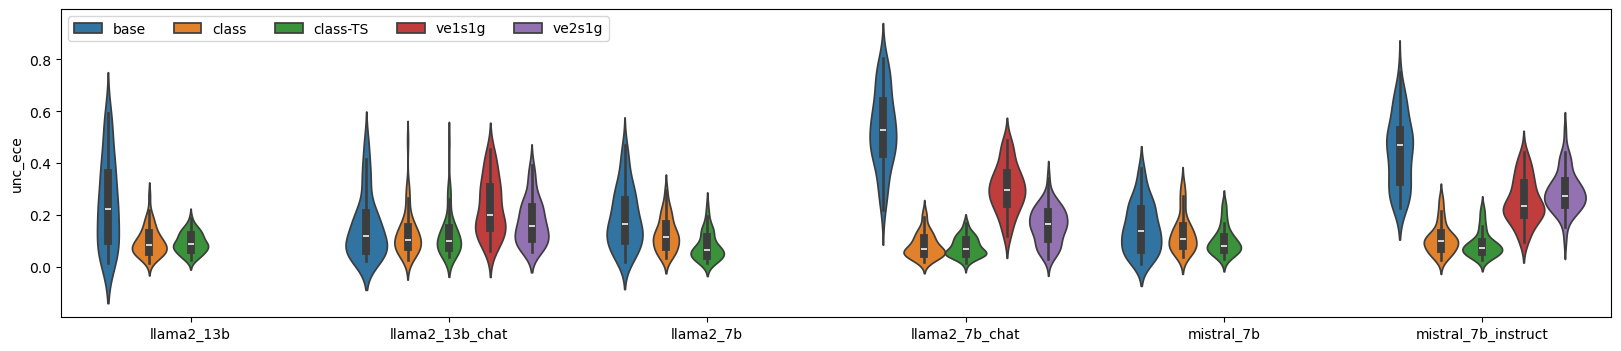

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

all_dfs = []
for fn in glob.glob("results/eval-mmlu_oe-base/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "base_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_choice-base/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "base_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

base_df = pd.concat(all_dfs)


all_dfs = []
for fn in glob.glob("results/eval-mmlu_oe-ct/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "ct_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

ct_df = pd.concat(all_dfs)

df = pd.read_csv("../classifier_results.csv")
df["model_name"] = df["model_name"].apply(lambda x: "class_" + x)
df["mode_tag"] = df["train_mode"] + " -> " + df["eval_mode"]

ts_df = pd.read_csv("../classifier_ts_results.csv")
ts_df["model_name"] = ts_df["model_name"].apply(lambda x: "class-TS_" + x)
ts_df["mode_tag"] = ts_df["train_mode"] + " -> " + ts_df["eval_mode"]

# df["model"] = df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
# df["style"] = df["model_name"].apply(lambda x: x.split("_")[0])

df = pd.concat([df, ts_df, base_df, ct_df])
df = df[df["mode_tag"] == "choice -> choice"]

df["model"] = df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
df["style"] = df["model_name"].apply(lambda x: x.split("_")[0])

ve_df = pd.read_csv("../ve_results.csv")
ve_df = ve_df[ve_df["eval_mode"] == "choice"]
ve_df["model"] = ve_df["model_name"]
ve_df["style"] = ve_df["eval_method"]

df = pd.concat([df, ve_df])
df = df[df['split'] == 'test']

#aggregate by model name
_df = df.groupby(["dataset", "model", "style"]).mean().reset_index()

fig, ax = plt.subplots(figsize=(20, 4))

sns.violinplot(
    ax=ax,
    data=_df,
    hue="style",
    x="model",
    y="unc_ece",
    # hue_order=order,
)

handles, labels = ax.get_legend_handles_labels()

sns.violinplot(
    data=_df,
    hue="style",
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_unc_ece",
    # hue_order=order,
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

ax.legend(handles=handles, labels=labels, loc='upper left', ncol=6)

plt.xlabel("")

# rotate the labels
# plt.xticks(rotation=30)

Text(0.5, 0, '')

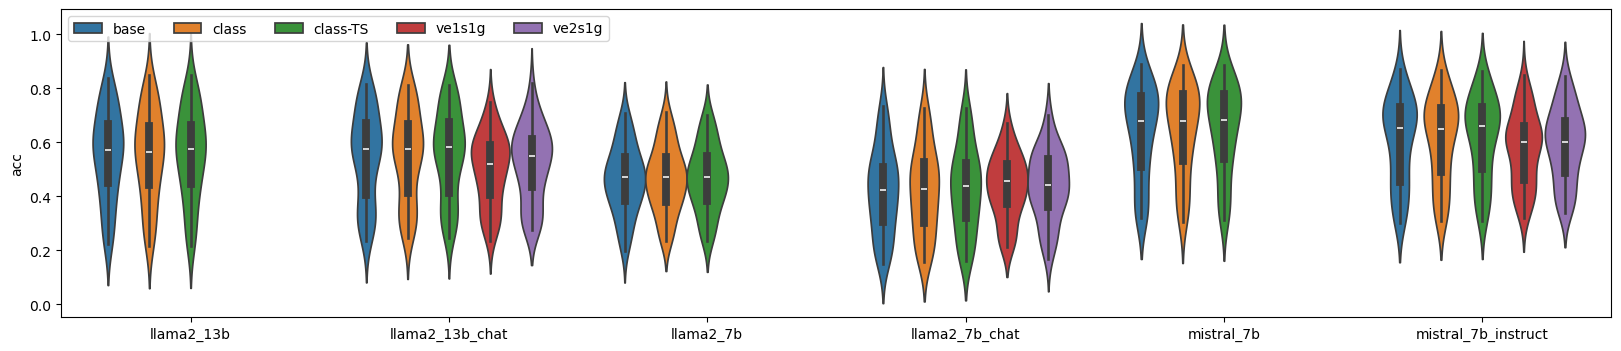

In [4]:
fig, ax = plt.subplots(figsize=(20, 4))

sns.violinplot(
    ax=ax,
    data=_df,
    hue="style",
    x="model",
    y="acc",
    # hue_order=order,
)

handles, labels = ax.get_legend_handles_labels()

sns.violinplot(
    data=_df,
    hue="style",
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_acc",
    # hue_order=order,
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

ax.legend(handles=handles, labels=labels, loc='upper left', ncol=6)

plt.xlabel("")

# rotate the labels
# plt.xticks(rotation=30)

/tmp/ipykernel_1659786/4249373748.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  _df = df.groupby(["model_name", "dataset", "mode_tag"]).mean().reset_index()


Text(0.5, 0, '')

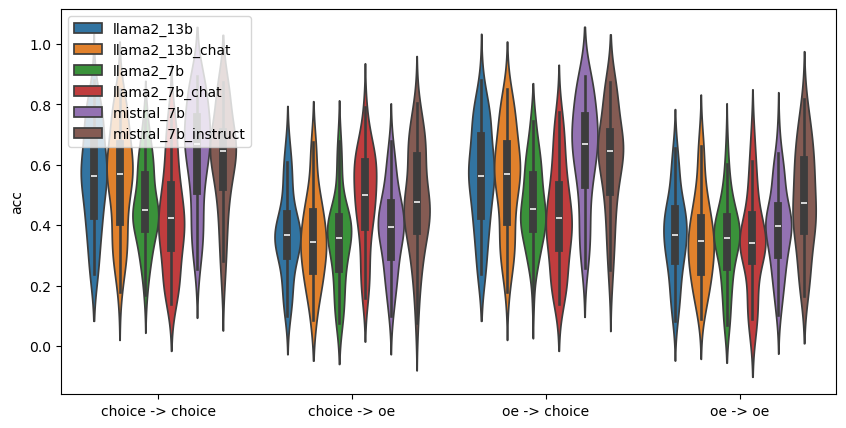

In [2]:
df = pd.read_csv("../classifier_results.csv")
df["mode_tag"] = df["train_mode"] + " -> " + df["eval_mode"]
# df = df[(df["eval_mode"] == "choice") & (df["train_mode"] == "choice")]

#aggregate by model name
_df = df.groupby(["model_name", "dataset", "mode_tag"]).mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 5))

sns.violinplot(
    ax=ax,
    data=_df,
    x="mode_tag",
    hue="model_name",
    y="acc",
    # order=df.groupby(["model_name"]).mean().reset_index().sort_values("unc_ece")["model_name"],
)

handles, labels = ax.get_legend_handles_labels()

sns.violinplot(
    data=_df,
    x="mode_tag",
    hue="model_name",
    y="fuzzy_gpt-3.5-turbo-1106_acc",
    # order=df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

ax.legend(handles=handles, labels=labels, loc='upper left')

plt.xlabel("")


In [3]:
df

,N,logits_ece,acc,unc_acc,unc_auroc,unc_ece,dataset,split,ts,model_name,train_mode,eval_mode,fuzzy_gpt-3.5-turbo-1106_acc,fuzzy_gpt-3.5-turbo-1106_unc_acc,fuzzy_gpt-3.5-turbo-1106_unc_auroc,fuzzy_gpt-3.5-turbo-1106_unc_ece,mode_tag
0,11,0.124105,0.272727,0.727273,0.750000,0.273788,mmlu:abstract_algebra,validation,4.572419,llama2_7b,choice,choice,NaN,NaN,NaN,NaN,choice -> choice
1,100,0.079532,0.330000,0.660000,0.562641,0.087229,mmlu:abstract_algebra,test,10.942548,llama2_7b,choice,choice,NaN,NaN,NaN,NaN,choice -> choice
2,14,0.229091,0.642857,0.500000,0.266667,0.233030,mmlu:anatomy,validation,1.659051,llama2_7b,choice,choice,NaN,NaN,NaN,NaN,choice -> choice
3,135,0.071602,0.474074,0.592593,0.579555,0.123047,mmlu:anatomy,test,15.729031,llama2_7b,choice,choice,NaN,NaN,NaN,NaN,choice -> choice
4,16,0.193459,0.437500,0.625000,0.555556,0.074194,mmlu:astronomy,validation,2.990021,llama2_7b,choice,choice,NaN,NaN,NaN,NaN,choice -> choice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,100,0.156133,0.700000,0.530000,0.483095,0.139453,mmlu:us_foreign_policy,test,13.116577,llama2_7b_chat,oe,choice,NaN,NaN,NaN,NaN,oe -> choice
1996,18,0.281525,0.444444,0.555556,0.412500,0.187469,mmlu:virology,validation,2.754456,llama2_7b_chat,oe,choice,NaN,NaN,NaN,NaN,oe -> choice
1997,166,0.316062,0.415663,0.506024,0.487151,0.135453,mmlu:virology,test,19.520353,llama2_7b_chat,oe,choice,NaN,NaN,NaN,NaN,oe -> choice
1998,19,0.083258,0.789474,0.473684,0.583333,0.231608,mmlu:world_religions,validation,1.793320,llama2_7b_chat,oe,choice,NaN,NaN,NaN,NaN,oe -> choice
